In [1]:
import os
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_user = os.getenv('DB_USER')
db_pass = os.getenv('DB_PASS')
db_name = os.getenv('DB_NAME')

connection = f'postgresql://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection)

In [3]:
table = 'customers'

query_frequency = f"""
SELECT user_id, COUNT(*)
FROM {table} 
WHERE event_type = 'purchase'
GROUP BY user_id
"""
query_monetary = f"""
SELECT user_id, SUM(price)
FROM {table} 
WHERE event_type = 'purchase'
GROUP BY user_id
HAVING SUM(price) < 225;
"""


In [4]:
# Ejecutar la consulta y cargar los datos en un DataFrame
try:
    data_frequency = pd.read_sql(query_frequency, engine)
except Exception as e:
    print(f"Error al conectar o consultar la base de datos: {e}")

# Mostrar las primeras filas del DataFrame
data_frequency.head()

,user_id,count
0,9794320,4
1,10079204,2
2,10280338,17
3,12055855,4
4,12936739,2


In [5]:
# Ejecutar la consulta y cargar los datos en un DataFrame
try:
    data_monetary = pd.read_sql(query_monetary, engine)
except Exception as e:
    print(f"Error al conectar o consultar la base de datos: {e}")

# Mostrar las primeras filas del DataFrame
data_monetary.head()

,user_id,sum
0,9794320,12.68
1,10079204,25.81
2,10280338,72.93
3,12055855,16.54
4,12936739,29.89


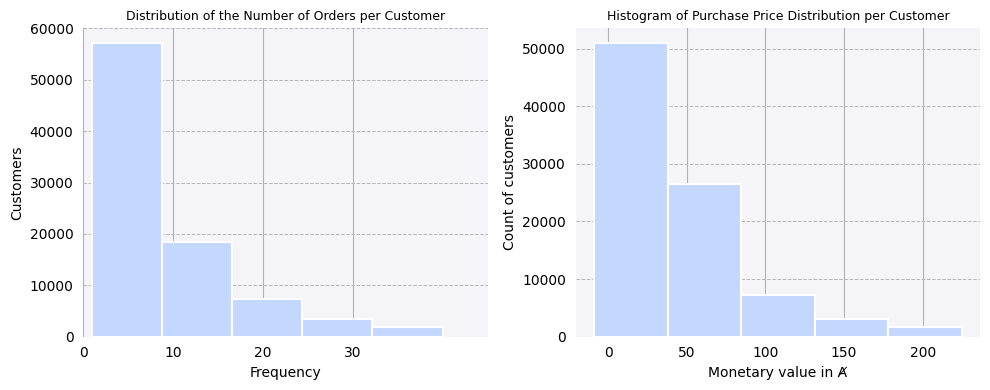

In [7]:
frequency = data_frequency['count'][data_frequency['count'] <= 40].tolist()
monetary = data_monetary['sum'].tolist()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].grid(True, zorder=-1)
axs[0].hist(
    frequency, 
    bins=5,
    edgecolor='white',    # Borde blanco de las barras
    color='#C4D7FF',      # Color de relleno
    linewidth=1.5,        # Grosor del borde
    histtype='bar',       # Tipo de histograma con barras personalizadas
    zorder=3              # Colocar las barras delante de la cuadrícula
)
axs[0].set_ylabel('Customers')
axs[0].set_xlabel('Frequency')
axs[0].set_xticks(range(0, 39, 10), range(0, 39, 10))
axs[0].set_xlim(0, 45)
axs[0].set_ylim(0, 60000)
axs[0].set_title('Distribution of the Number of Orders per Customer', fontsize=9)

axs[1].grid(True, zorder=-1)
axs[1].hist(
    monetary, 
    bins=5,
    edgecolor='white',    # Borde blanco de las barras
    color='#C4D7FF',      # Color de relleno
    linewidth=1.5,        # Grosor del borde
    histtype='bar',       # Tipo de histograma con barras personalizadas
    zorder=3              # Colocar las barras delante de la cuadrícula
)
axs[1].set_ylabel('Count of customers')
axs[1].set_xlabel('Monetary value in Ⱥ')
axs[1].set_title('Histogram of Purchase Price Distribution per Customer', fontsize=9)

for ax in axs:
    ax.set_axisbelow(True)
    ax.set_facecolor('#F5F5F7')  # Fondo
    ax.spines['top'].set_visible(False)      # Desactivar borde superior
    ax.spines['right'].set_visible(False)    # Desactivar borde derecho
    ax.spines['left'].set_visible(False)     # Desactivar borde izquierdo
    ax.spines['bottom'].set_visible(False)   # Desactivar borde inferior
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    ax.tick_params(axis='y', which='both', left=False, right=False)
    ax.grid(axis='y', color='#B7B7B7', linestyle='--', linewidth=0.7, zorder=0)
   
plt.tight_layout()
plt.show()
